<a href="https://colab.research.google.com/github/marutitaluru/AIML_projects/blob/main/SIG742_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 2.1:
The dataset used here is the New York City Taxi Demand dataset. The raw data is from the
NYC Taxi and Limousine Commission. The data included here consists of aggregating the total
number of taxi passengers into 30 minute buckets. In this question, we will simply process the
data and explore the time series.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [128]:
# Load the CSV file into a DataFrame
df = pd.read_csv('nyc_taxi.csv')

In [129]:
# Ensuring that the 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

##• Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.

In [130]:
# Creating df_day by aggregating valued on a daily level
df_day = df.groupby(df['timestamp'].dt.date)['value'].sum()
df_day.head()

timestamp
2014-07-01    745967
2014-07-02    733640
2014-07-03    710142
2014-07-04    552565
2014-07-05    555470
Name: value, dtype: int64

In [131]:
# Create df_hour by aggregating valued on an hourly level
df_hour = df.groupby(df['timestamp'].dt.hour)['value'].sum()

In [132]:
print("\nHourly valued DataFrame (df_hour):")
print(df_hour.head())


Hourly valued DataFrame (df_hour):
timestamp
0    6296122
1    4669140
2    3444457
3    2495045
4    1833559
Name: value, dtype: int64


<Axes: xlabel='timestamp', ylabel='value'>

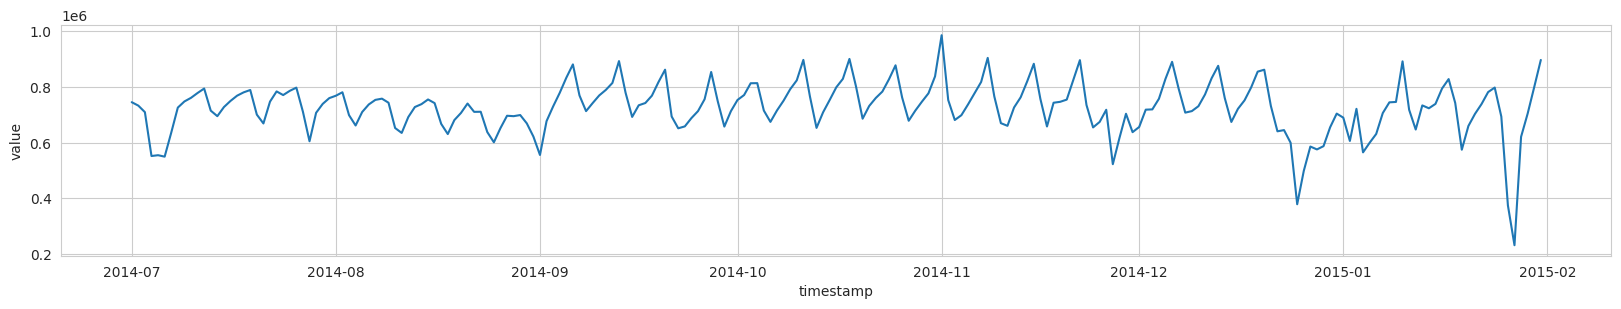

In [133]:
plt.rcParams["figure.figsize"] = (20,3)
sns.lineplot(df_day)

<Axes: xlabel='timestamp', ylabel='value'>

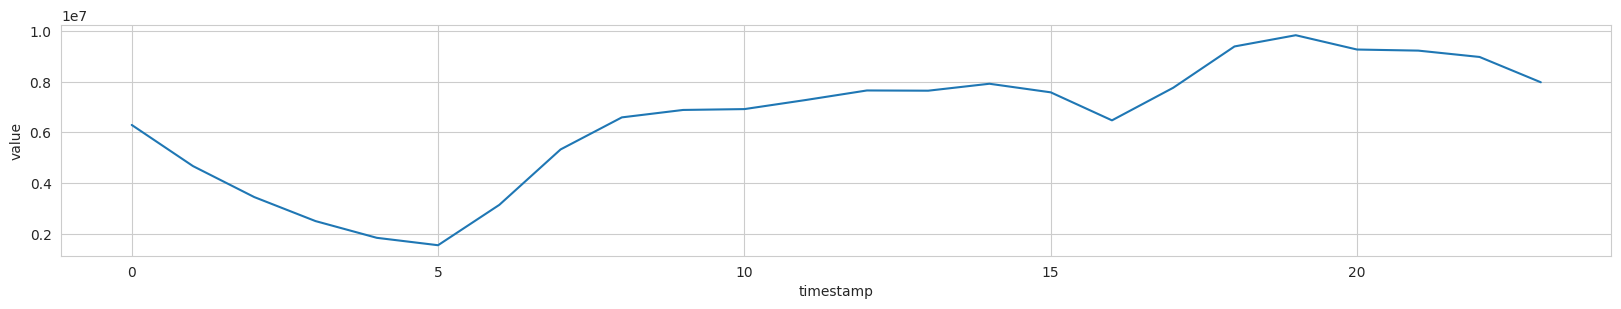

In [134]:
plt.rcParams["figure.figsize"] = (20,3)
sns.lineplot(df_hour)

##•  Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe.

In [135]:
# Convert the Series to a DataFrame and assign a name to the first column
df_day = df_day.to_frame()
df_day.columns = ['demand_day']

In [136]:
df_day.head()

,demand_day
timestamp,
2014-07-01,745967
2014-07-02,733640
2014-07-03,710142
2014-07-04,552565
2014-07-05,555470


### Additive Decomposition

In [137]:
# Additive Decomposition
add_result = seasonal_decompose(df_day, model='additive', period=1)

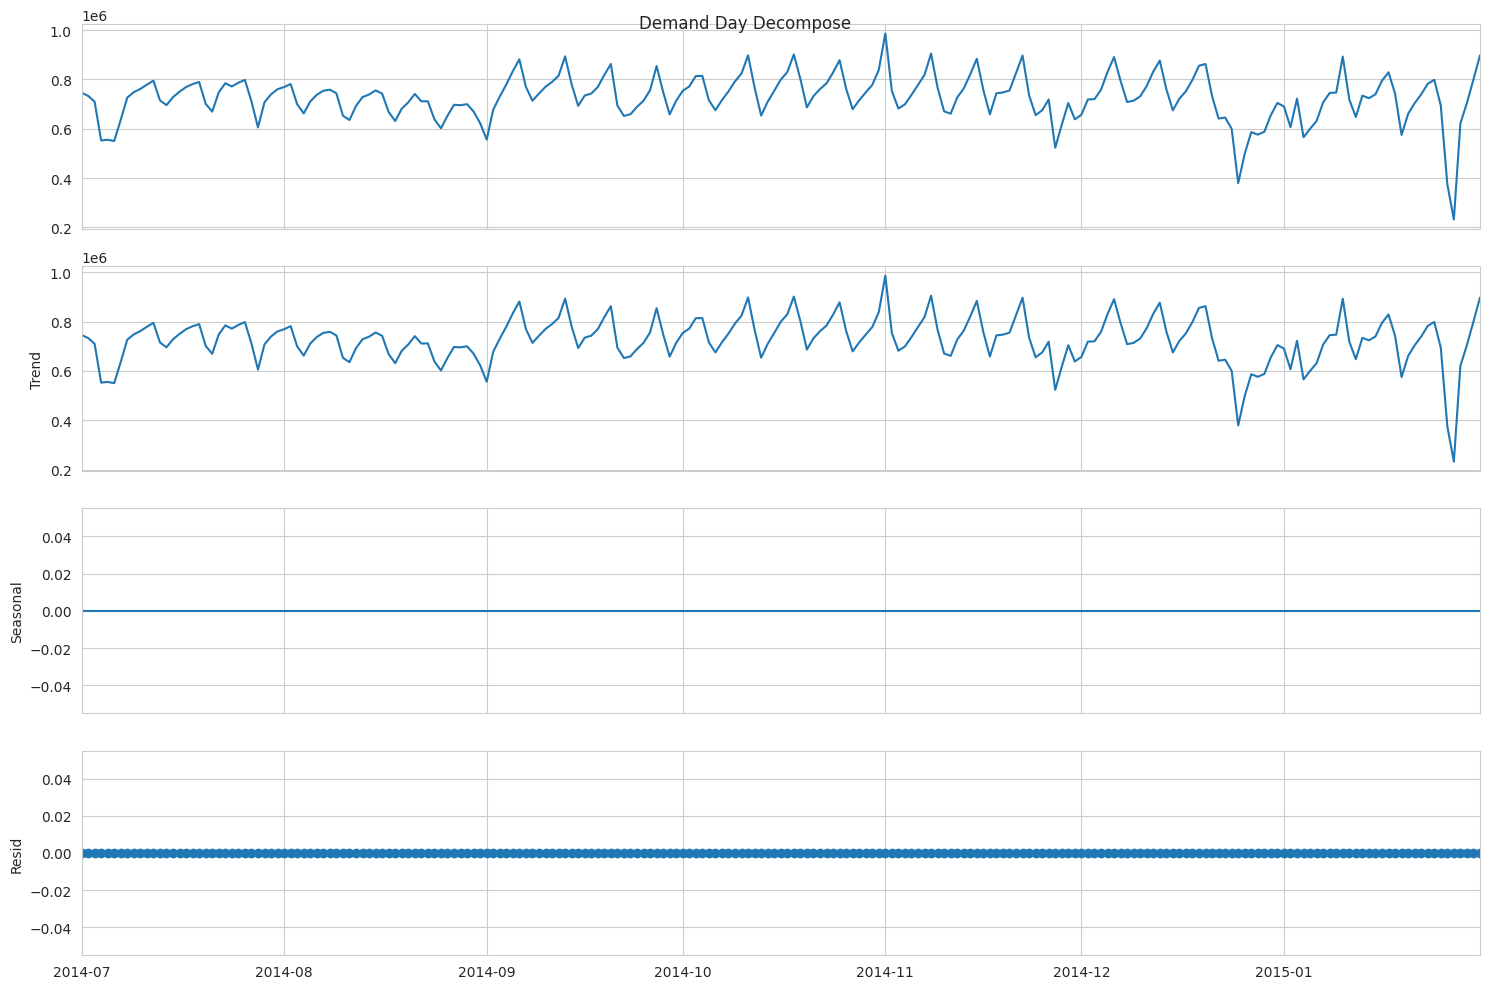

In [138]:
plt.rcParams["figure.figsize"] = (15,10)
add_result.plot().suptitle('Demand Day Decompose', fontsize=12)
plt.show()


#### Multiplicative Decomposition

In [139]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(df_day, model='multiplicative', period=1)

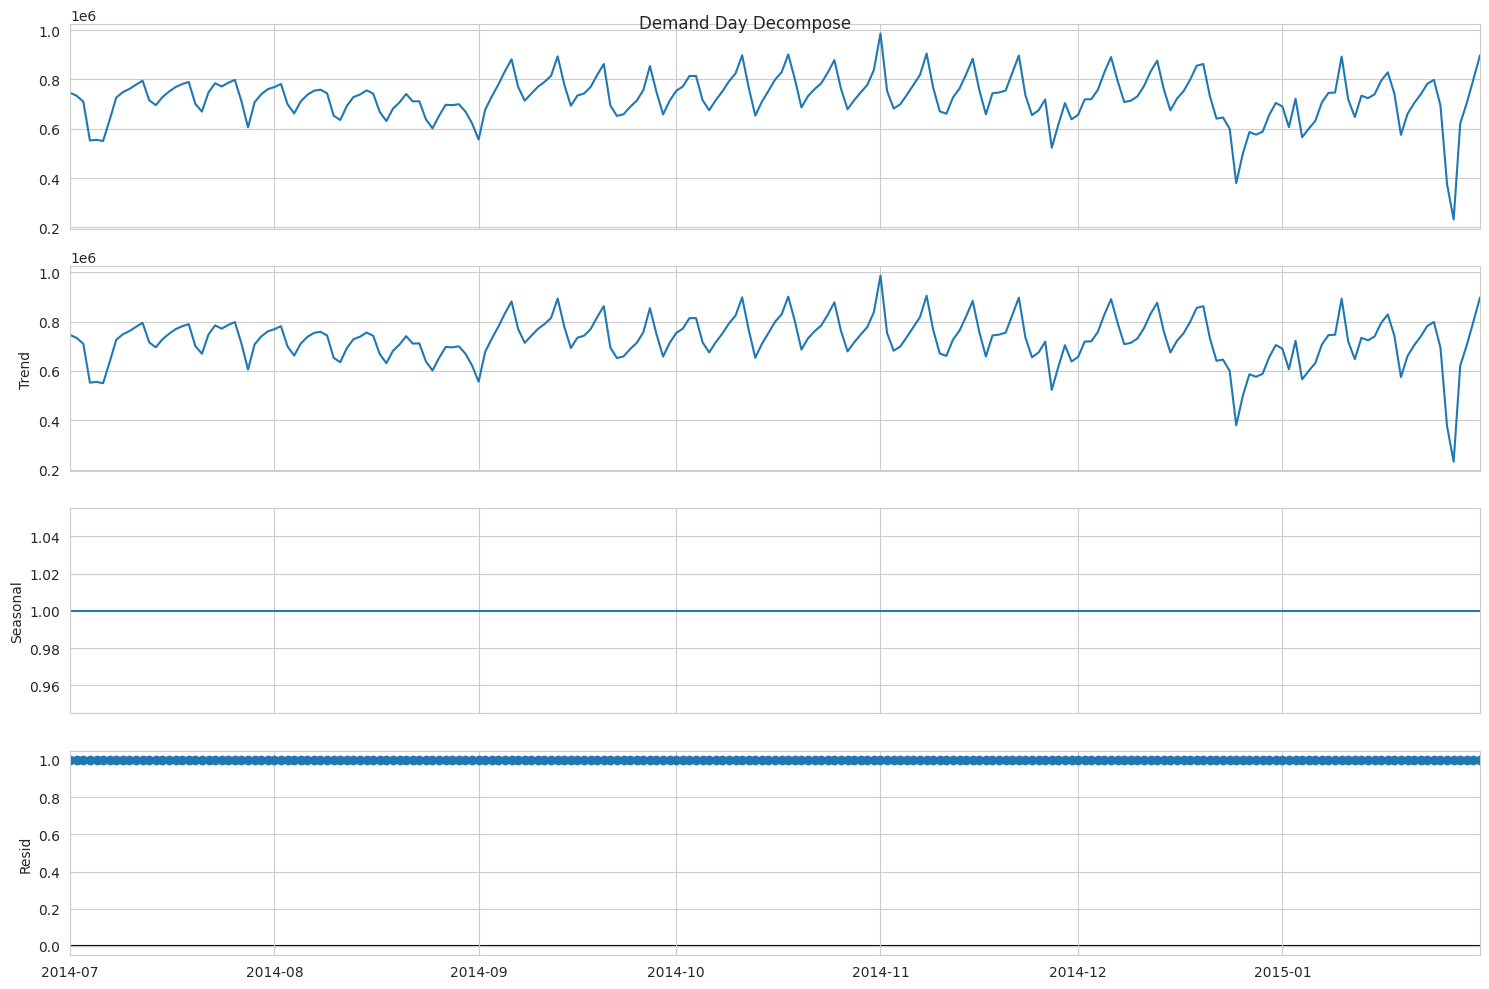

In [140]:
plt.rcParams["figure.figsize"] = (15,10)
mul_result.plot().suptitle('Demand Day Decompose', fontsize=12)
plt.show()

In [141]:
df_day.head()

,demand_day
timestamp,
2014-07-01,745967
2014-07-02,733640
2014-07-03,710142
2014-07-04,552565
2014-07-05,555470


##•  Find out the p value from adfuller test. Do you think the df_day is stationary enough (please explain your reasons in comments and report)?


In [142]:
from statsmodels.tsa.stattools import adfuller
#let's pass the time series into the adfuller test function, firstly let's test the original
adft = adfuller(df_day.demand_day,autolag="AIC")

In [143]:
# let's check the test results

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0   -3.448094              Test Statistics
1    0.009425                      p-value
2    9.000000             No. of lags used
3  205.000000  Number of observations used
4   -3.462658          critical value (1%)
5   -2.875744          critical value (5%)
6   -2.574341         critical value (10%)


## Comments:
### Observation: We think that df_day is likely stationary because of below reasons:

###Task performed: Stationary test
A stationary time series is one with constant mean and constant variance over time. It means that the statistical properties of the series do not change with time, and it's easier to model and analyze.

###How is it done: Augmented Dickey-Fuller Test (ADF)
The ADF test is a statistical test used to determine if a time series is stationary or not. The test compares a test statistic to critical values and assesses the p-value.
The null hypothesis of the test is that the time series is non-stationary
The alternative hypothesis is that it is stationary.

If the p-value is less than a chosen significance level (commonly 0.05 or 5%), we reject the null hypothesis, indicating that the time series is likely stationary.

If the p-value is greater than the significance level, you fail to reject the null hypothesis, suggesting that the time series may be non-stationary.

###Observations:
1) The p-value is 0.009425 which is less than 0.05 (considering significance level of 5%). A p-value below the chosen significance level (e.g., 0.05) is providing evidence to reject the null hypothesis. In this case, it suggests that the time series is likely stationary.

2) Test Statistics: The test statistic -3.448094 is more negative than the critical values. A more negative test statistic generally suggests stronger evidence against the null hypothesis i.e it suggests that the time series is likely stationary.

Based on these results, it appears that the time series is likely stationary. The test statistic is sufficiently negative, the p-value is less than the significance level, and the test statistic is below the critical values at various significance levels

# Question 2.2
##In this question, we will try to use time series model such as ARIMA and others to build the model(s) for forecasting the future.


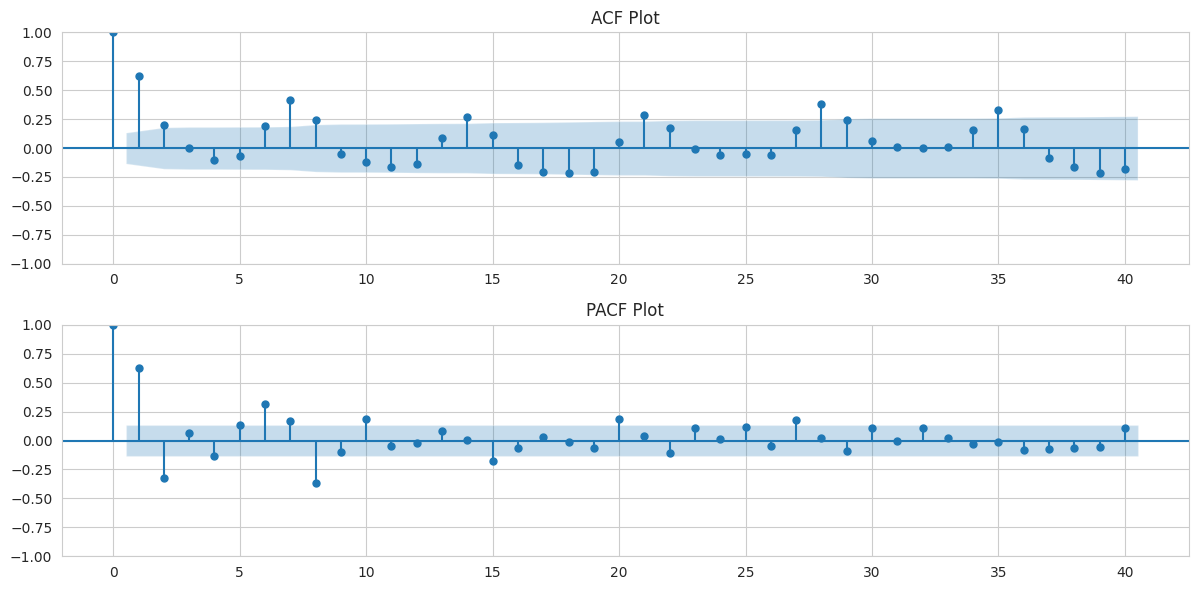

In [144]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(211)
plot_acf(df_day['demand_day'], lags=40, ax=plt.gca())
plt.title('ACF Plot')

# PACF Plot
plt.subplot(212)
plot_pacf(df_day['demand_day'], lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()
